### Opdracht: Inzicht creeeren in de hangende nota's (nota's die in onze workflow engine blijven hangen). En leren hoe we op nieuwe declaraties kunnen gaan anticiperen.

Context: Voor het ontvangen van declaraties van Vecozo maken wij gebruik van de Voorportaal applicatie. Op dit moment is er geen enkele manier om overzicht te krijgen over hoe deze dat eruit ziet. In dit notebook zal ik enkele pogingen doen om deze data beter te kunnen begrijpen.

Producten: Automatisch een dashboard bijwerken betreffende de declaraties en hangende nota's en dit gebruiken om doormiddel van machine learning te anticiperen en te kunnen schalen in verwerkings capaciteit.

Alle data is doormiddel van pd.read_sql() opgehaald en omgezet naar CSV om zo niet de database verbinding nodig te hebben. 

Business vraag: Wat is de verdeling van uitgevoerde zorg die gedeclareerd wordt?

De WebserviceInputDeclaratie dataframe opbouwen. Dit zijn alle ingevoerde declaraties. Een hele lading aan slecht leesbare data.

In [2]:
import pandas as pd

webserviceInputDeclaratie = pd.read_csv('WebserviceInputDeclaratie.csv', index_col='Id')
print(webserviceInputDeclaratie.head())

    Unnamed: 0  VerwerkenErrorCount               Accordeerdatum  \
Id                                                                 
1            0                    0  2023-02-10 09:05:30.9133333   
2            1                    0  2023-02-10 09:05:30.8933333   
3            2                    0  2023-02-10 09:05:30.9366667   
4            3                    0  2023-02-10 09:05:30.9366667   
5            4                    0  2023-02-10 09:05:30.9500000   

    CodeInstelling  CodePraktijk  CodeServicebureau  CodeZorgverlener  \
Id                                                                      
1                0             0                  0                 0   
2                0             0                  0                 0   
3                0             0                  0                 0   
4                0             0                  0                 0   
5                0             0                  0                 0   

   DebetCre

De verdeling van StandaardCode's in beeld brengen. StandaardCode's zijn codes gekoppeld aan de type zorg die verleend is.

<AxesSubplot:ylabel='StandaardCode'>

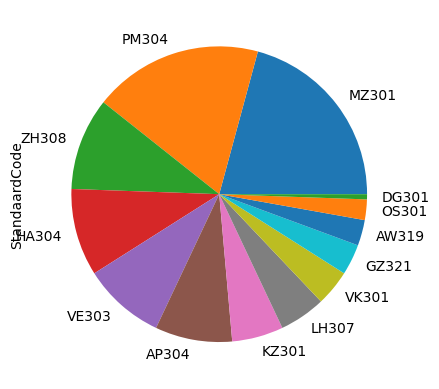

In [3]:
webserviceInputDeclaratie['StandaardCode'].value_counts().plot.pie(label='StandaardCode')

Data leesbaarder maken want deze codes zijn niet erg leesbaar. Om de codes makkelijk te kunnen koppelen aan een label heb ik een andere dataset nodig.

<AxesSubplot:ylabel='Declaratie type'>

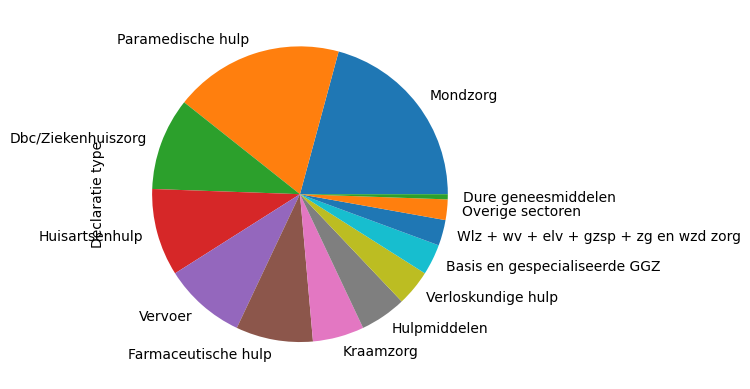

In [13]:
standaardCodeLabel = pd.read_csv('standaardcodelabel.csv');
standaardCodeLabel = standaardCodeLabel.rename(columns={ 'label': 'StandaardCodeLabel' })
webserviceInputDeclaratieLeesbaar = webserviceInputDeclaratie.merge(standaardCodeLabel, on='StandaardCode')
webserviceInputDeclaratieLeesbaar['StandaardCodeLabel'].value_counts().plot.pie(label='Declaratie type')

Wat betekent dit in percentages?

<AxesSubplot:>

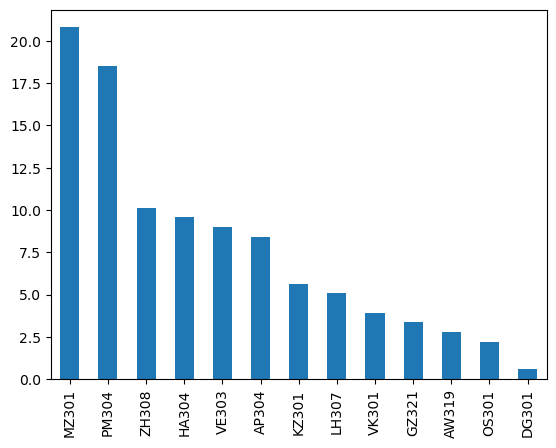

In [25]:
webserviceInputDeclaratie['StandaardCode'] \
    .value_counts(normalize=True) \
    .mul(100).round(1) \
    .plot.bar(x='StandaardCode', y='Percentage')

<AxesSubplot:>

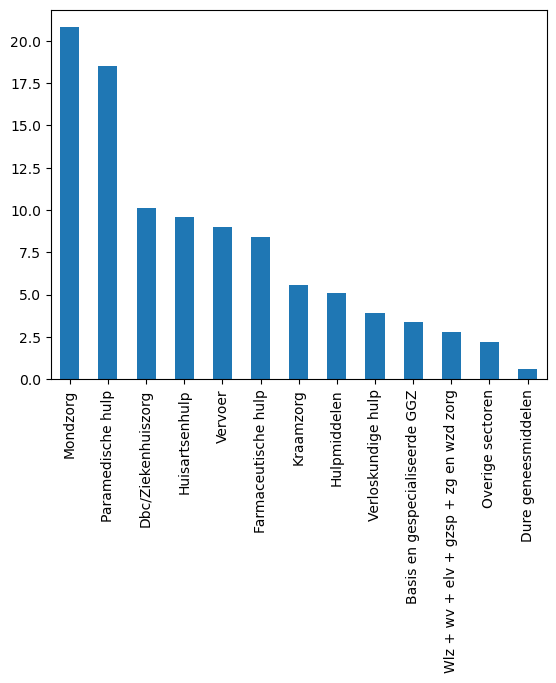

In [35]:
webserviceInputDeclaratieLeesbaar['StandaardCodeLabel'] \
    .value_counts(normalize=True) \
    .mul(100).round(1) \
    .plot.bar(x='StandaardCode', y='Percentage')

En tot slot in een dataframe voor overzicht

In [42]:
df = webserviceInputDeclaratieLeesbaar[['StandaardCodeLabel', 'StandaardCode']] \
    .value_counts(normalize=True) \
    .mul(100).round(1)

df_value_counts = pd.DataFrame(df)
df_value_counts = df_value_counts.reset_index()
df_value_counts.columns = ['StandaardCodeLabel', 'StandaardCode', 'Percentage']

pd.DataFrame(df_value_counts)

,StandaardCodeLabel,StandaardCode,Percentage
0,Mondzorg,MZ301,20.8
1,Paramedische hulp,PM304,18.5
2,Dbc/Ziekenhuiszorg,ZH308,10.1
3,Huisartsenhulp,HA304,9.6
4,Vervoer,VE303,9.0
5,Farmaceutische hulp,AP304,8.4
6,Kraamzorg,KZ301,5.6
7,Hulpmiddelen,LH307,5.1
8,Verloskundige hulp,VK301,3.9
9,Basis en gespecialiseerde GGZ,GZ321,3.4
